#DSC 672 Project by Vikram Kalister and Shreyas Ravi

## Importing Packages

In [77]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sklearn.__version__

'0.24.2'

In [ ]:
!pip install pymc3==3.10
!pip install arviz==0.10
!pip install pgmpy

     |████████████████████████████████| 1.9 MB 5.4 MB/s 
     |████████████████████████████████| 2.8 MB 36.3 MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.0.11-py3-none-any.whl size=2572038 sha256=a28d65d48323245585c483d3f61751b495a55dc1d7fac8772efb705c9dd19c18
  Stored in directory: /root/.cache/pip/wheels/45/cd/5b/6b7f84f36d564107f0786ce959bcb7641e07c764cb9abdf222
Successfully built theano-pymc
  Attempting uninstall: theano-pymc
    Found existing installation: Theano-PyMC 1.1.2
    Uninstalling Theano-PyMC-1.1.2:
      Successfully uninstalled Theano-PyMC-1.1.2
  Attempting uninstall: pymc3
    Found existing installation: pymc3 3.11.4
    Uninstalling pymc3-3.11.4:
      Successfully uninstalled pymc3-3.11.4
     |████████████████████████████████| 1.5 MB 5.1 MB/s 
  Attempting uninstall: arviz
    Found existing installation: arviz 0.12.0
    Uninstalling arviz-0.12.0:
      Successfully uninstalled arviz-0.12.0
     |████████████████████████████████| 1.9 MB 5.1 MB

In [78]:
import pymc3 as pm
import arviz as az

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [80]:
data = pd.read_csv('cardio_train-1.csv', sep = ";")

In [85]:
data.shape

(70000, 13)

In [86]:
df = data.sample(frac=0.25)

In [87]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
18735,26759,23450,1,145,50.0,120,80,1,1,0,0,1,1
3822,5411,23388,1,153,64.0,120,80,3,1,0,0,0,1
64307,91787,15117,1,162,60.0,120,80,1,1,0,0,1,1
61342,87584,21156,2,166,66.0,130,90,1,1,0,0,1,1
10749,15370,18038,2,175,68.0,120,80,1,1,0,0,1,0


In [88]:
df.shape

(17500, 13)

In [89]:
df.info()
df["age"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17500 entries, 18735 to 57821
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           17500 non-null  int64  
 1   age          17500 non-null  int64  
 2   gender       17500 non-null  int64  
 3   height       17500 non-null  int64  
 4   weight       17500 non-null  float64
 5   ap_hi        17500 non-null  int64  
 6   ap_lo        17500 non-null  int64  
 7   cholesterol  17500 non-null  int64  
 8   gluc         17500 non-null  int64  
 9   smoke        17500 non-null  int64  
 10  alco         17500 non-null  int64  
 11  active       17500 non-null  int64  
 12  cardio       17500 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 1.9 MB


18735    23450
3822     23388
64307    15117
61342    21156
10749    18038
         ...  
29732    19689
49391    22690
67396    19651
34452    20450
57821    22625
Name: age, Length: 17500, dtype: int64

In [90]:
df["Age"] = df["age"]/365
del df["age"]
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age
18735,26759,1,145,50.0,120,80,1,1,0,0,1,1,64.246575
3822,5411,1,153,64.0,120,80,3,1,0,0,0,1,64.076712
64307,91787,1,162,60.0,120,80,1,1,0,0,1,1,41.416438
61342,87584,2,166,66.0,130,90,1,1,0,0,1,1,57.961644
10749,15370,2,175,68.0,120,80,1,1,0,0,1,0,49.419178


In [91]:
df['height'] = df['height']/100

In [92]:
df['height']

18735    1.45
3822     1.53
64307    1.62
61342    1.66
10749    1.75
         ... 
29732    1.62
49391    1.60
67396    1.88
34452    1.60
57821    1.72
Name: height, Length: 17500, dtype: float64

In [93]:
df['bmi'] = df['weight']/((df['height'])**2)

In [94]:
del df['weight']
del df['height']

In [95]:
df.head()

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,bmi
18735,26759,1,120,80,1,1,0,0,1,1,64.246575,23.781213
3822,5411,1,120,80,3,1,0,0,0,1,64.076712,27.339912
64307,91787,1,120,80,1,1,0,0,1,1,41.416438,22.862369
61342,87584,2,130,90,1,1,0,0,1,1,57.961644,23.951227
10749,15370,2,120,80,1,1,0,0,1,0,49.419178,22.204082


In [40]:
 # df['bmi']

In [96]:
df["age"] = df["Age"].round()
del df["Age"]
del df['id']
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
18735,1,120,80,1,1,0,0,1,1,23.781213,64.0
3822,1,120,80,3,1,0,0,0,1,27.339912,64.0
64307,1,120,80,1,1,0,0,1,1,22.862369,41.0
61342,2,130,90,1,1,0,0,1,1,23.951227,58.0
10749,2,120,80,1,1,0,0,1,0,22.204082,49.0


In [44]:
df['bmi'] = df['bmi'].round()
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
0,2,110,80,1,1,0,0,1,0,22.0,50.0
1,1,140,90,3,1,0,0,1,1,35.0,55.0
2,1,130,70,3,1,0,0,0,1,24.0,52.0
3,2,150,100,1,1,0,0,1,1,29.0,48.0
4,1,100,60,1,1,0,0,0,0,23.0,48.0


In [97]:
df = df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]]
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
18735,1,120,80,1,1,0,0,1,1,23.781213,64.0
3822,1,120,80,3,1,0,0,0,1,27.339912,64.0
64307,1,120,80,1,1,0,0,1,1,22.862369,41.0
61342,2,130,90,1,1,0,0,1,1,23.951227,58.0
10749,2,120,80,1,1,0,0,1,0,22.204082,49.0


In [98]:
scaler = MinMaxScaler()

In [99]:
df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]] = scaler.fit_transform(df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]])

In [100]:
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
18735,0.0,0.016973,0.008878,0.0,0.0,0.0,0.0,1.0,1.0,0.053766,0.971429
3822,0.0,0.016973,0.008878,1.0,0.0,0.0,0.0,0.0,1.0,0.067567,0.971429
64307,0.0,0.016973,0.008878,0.0,0.0,0.0,0.0,1.0,1.0,0.050203,0.314286
61342,1.0,0.017680,0.009988,0.0,0.0,0.0,0.0,1.0,1.0,0.054425,0.800000
10749,1.0,0.016973,0.008878,0.0,0.0,0.0,0.0,1.0,0.0,0.047650,0.542857


Text(0.5, 1.0, 'Correlation Plot')

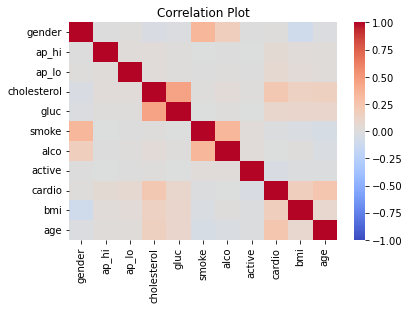

In [48]:
sns.heatmap(data = df.corr(), vmin = -1, vmax = 1, cmap = "coolwarm")
plt.title("Correlation Plot")

Text(0.5, 1.0, 'Presence of Heart Disease based on activity')

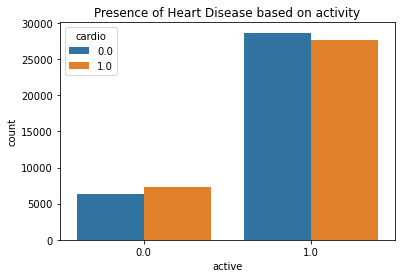

In [49]:
sns.countplot(x = "active", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on activity")

Text(0.5, 1.0, 'Presence of Heart Disease based on age')

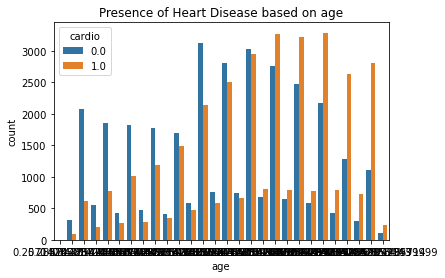

In [50]:
sns.countplot(x = "age", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on age")

Text(0.5, 1.0, 'Presence of Heart Disease based on cholesterol')

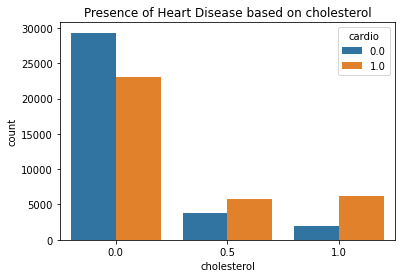

In [51]:
sns.countplot(x = "cholesterol", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on cholesterol")

In [104]:
X = df.drop("cardio", axis = 1)
y = df["cardio"]

## Multicolinearity & Feature Selection

In [101]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
X = df[list(df.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)
# High VIF indicates that there's multicollinearity

,VIF,Column
10,8.961496,age
9,7.700555,bmi
7,4.270149,active
1,3.578622,ap_hi
8,2.258046,cardio
3,1.731150,cholesterol
0,1.715544,gender
4,1.474536,gluc
5,1.388046,smoke
2,1.313905,ap_lo


## Models Used
1. Decision Trees
2. Random Forest Classifier
3. Naive Bayes
4. Support Vector Machines (SVM)
5. Support Vector Machines (PCA) **OPTIONAL**
6. Bayesian Analysis

## Preparing Data for Machine Learning

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

## Decision Trees

In [106]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [107]:
dt = DecisionTreeClassifier(random_state = 40)
dt.fit(X_train,y_train)
pred_train = dt.predict(X_train)
print("Accuracy Train", metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

pred = dt.predict(X_test)
print("Accuracy Test", metrics.accuracy_score(y_true = y_test, y_pred = pred))

Accuracy Train 0.9906122448979592
Accuracy Test 0.6365714285714286


In [108]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.63      0.65      0.64      2587
         1.0       0.65      0.63      0.64      2663

    accuracy                           0.64      5250
   macro avg       0.64      0.64      0.64      5250
weighted avg       0.64      0.64      0.64      5250



### Grid Search for Decision Trees

## Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [110]:
RF = RandomForestClassifier()

In [111]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [112]:
pred = RF.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred)

0.9906122448979592

In [113]:
pred_test = RF.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred_test)

0.6868571428571428

In [114]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68      2587
         1.0       0.69      0.69      0.69      2663

    accuracy                           0.69      5250
   macro avg       0.69      0.69      0.69      5250
weighted avg       0.69      0.69      0.69      5250



### Grid Search for Random Forest Classifier

In [115]:
parameters = {
    "min_samples_split": [100, 500, 1000, 2000], 
    "max_depth": [10, 50, 100, 200], 
    "n_estimators": [100, 500, 1000]
}

In [116]:
grid = GridSearchCV(RF, parameters, cv = 3, n_jobs = -1)

In [118]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100, 200],
                         'min_samples_split': [100, 500, 1000, 2000],
                         'n_estimators': [100, 500, 1000]})

In [119]:
grid.best_estimator_

RandomForestClassifier(max_depth=50, min_samples_split=100, n_estimators=1000)

In [120]:
rf = RandomForestClassifier(max_depth=10, min_samples_split=100)

In [121]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=100)

In [122]:
rf_pred = rf.predict(X_test)

In [123]:
print(confusion_matrix(y_test, rf_pred))

[[1966  621]
 [ 817 1846]]


In [124]:
print(metrics.classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73      2587
         1.0       0.75      0.69      0.72      2663

    accuracy                           0.73      5250
   macro avg       0.73      0.73      0.73      5250
weighted avg       0.73      0.73      0.73      5250



## Naive Bayes

In [125]:
from sklearn.naive_bayes import GaussianNB

In [126]:
g = GaussianNB()

In [127]:
g.fit(X_train, y_train)

GaussianNB()

In [128]:
pred = g.predict(X_train)
metrics.accuracy_score(y_train, pred)

0.6016326530612245

In [129]:
pred = g.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.5906666666666667

In [130]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.56      0.85      0.67      2587
         1.0       0.70      0.34      0.46      2663

    accuracy                           0.59      5250
   macro avg       0.63      0.59      0.56      5250
weighted avg       0.63      0.59      0.56      5250



### Grid Search for Naive Bayes

## Support Vector Machines

In [131]:
from sklearn.svm import SVC

In [132]:
estimator = SVC(kernel ='rbf')

In [133]:
estimator.fit(X_train,y_train)

SVC()

In [134]:
pred = estimator.predict(X_train)

In [135]:
svm = metrics.accuracy_score(y_train,pred)

In [136]:
svm_pred2 = estimator.predict(X_test)

In [137]:
svm1 = metrics.accuracy_score(y_test,svm_pred2)

In [138]:
print("Training Accuracy: " + str(svm))
print("Testing Accuracy: " + str(svm1))

Training Accuracy: 0.6384489795918368
Testing Accuracy: 0.6245714285714286


In [139]:
print(metrics.classification_report(y_test, svm_pred2))

              precision    recall  f1-score   support

         0.0       0.61      0.68      0.64      2587
         1.0       0.65      0.57      0.61      2663

    accuracy                           0.62      5250
   macro avg       0.63      0.63      0.62      5250
weighted avg       0.63      0.62      0.62      5250



### Grid Search for Support Vector Machines

In [140]:
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100, 1000]
}

In [141]:
cv_1 = GridSearchCV(estimator, parameters, cv=3, n_jobs=-1)

In [142]:
cv_1.fit(X_train, y_train)

/Users/shreyasravi/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']})

In [143]:
cv_1.best_estimator_

SVC(C=1000, kernel='linear')

In [144]:
svc = SVC(C=1000, kernel='linear')

In [145]:
svc.fit(X_train, y_train)

SVC(C=1000, kernel='linear')

In [146]:
svc_pred = svc.predict(X_test)

In [147]:
print(confusion_matrix(y_test, svc_pred))

[[2013  574]
 [ 997 1666]]


In [148]:
print(metrics.classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72      2587
         1.0       0.74      0.63      0.68      2663

    accuracy                           0.70      5250
   macro avg       0.71      0.70      0.70      5250
weighted avg       0.71      0.70      0.70      5250



## Support Vector Machines (PCA) **OPTIONAL**



### Grid Search for Support Vector Machines (PCA) **OPTIONAL**

## Final Data Visualizations